In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import networkx as nx

In [2]:
path = '/Users/bengieru/Downloads/tools_for_teaching-master'
input_arr = ['Midterm I', 'Midterm II', 'Homework I', 'Homework II', 'Homework III', 'Homework IV','Homework V']
weights = [15/100,15/100,5/100,5/100,5/100,5/100, 5/100]
grade = open( path +"/grades_raw.csv", "r")
reader_grades = csv.reader(grade)
arr = [line for line in enumerate(reader_grades)]

In [3]:
def where(n, arr):
    for i in range(len(arr)):
        if n == arr[i]:return(i)

In [4]:
def if_zero(entry):
    if entry == '': return('0')
    else: return(entry)

In [5]:
def max_points(inputs,arr):
    maxs_for_inputs = []
    for i,n in enumerate(inputs):
        w = where(n + ' - Max Points', arr)
        maxs_for_inputs.append(w)
    return(maxs_for_inputs)

In [6]:
def normalize(inputs,arr,scores):
    normalized_scores = np.zeros((np.array(scores).shape))
    maximums = max_points(inputs,arr[0][1])
    for i in range(len(inputs)):
        for j in range(len(arr[:])-1):
            normalized_scores[i][j] = np.array(scores,dtype= float)[i][j]/float(arr[1][1][maximums[i]])*100
    return(normalized_scores)

In [7]:
def averages(norm_scores,weights):
    averages = []
    for i in range(norm_scores.shape[1]):
        averages.append(np.dot(np.transpose(norm_scores)[i],weights))
    return(averages)

In [8]:
def read_all(column_names, csv):
    names = []
    sid = []
    scores = [[] for i in range(len(input_arr))]
    for i,m in enumerate(arr[0][1]):
        for k in range(1,len(arr[:])):
            if m == 'Name': names.append(arr[k][1][0])
            elif m == 'SID': sid.append(arr[k][1][1])
    p = 0
    for j,n in enumerate(input_arr):
        if n in arr[0][1]: 
            for k in range(1,len(arr[:])):
                scores[p].append(float(if_zero(arr[k][1][where(n,arr[0][1])])))
            p = p + 1
    return(names,sid,scores)

In [9]:
s_names,s_id,s_scores = read_all(input_arr,arr)

In [10]:
norm_scores = normalize(input_arr,arr,s_scores)

In [12]:
avs = averages(norm_scores,weights)

In [17]:
len(avs)

59

NameError: name 'av' is not defined

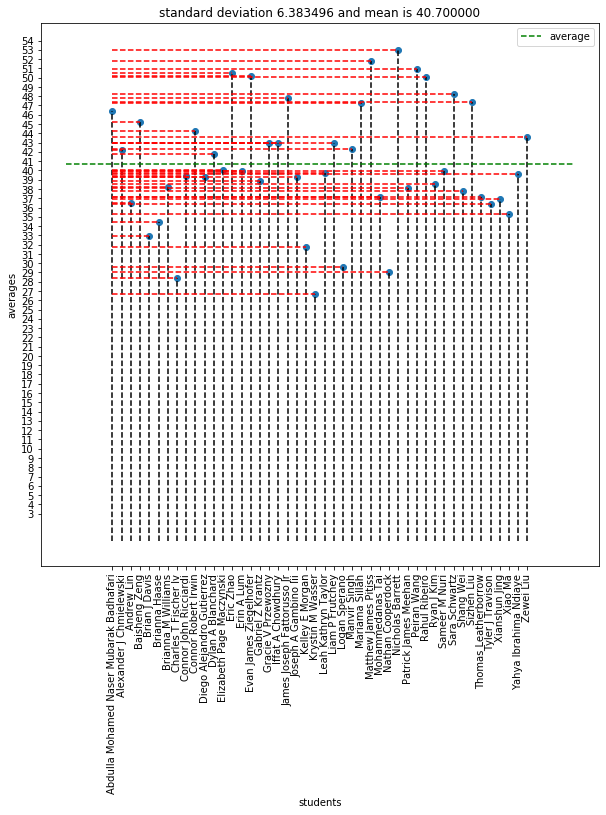

In [52]:
x = np.arange(46)
k = np.mean(averages)
s = np.std(averages)
fig,ax = plt.subplots(1,1,figsize = (10,10))
plt.vlines(x, 0, averages, linestyle = "dashed")
plt.hlines(averages, 0, x, linestyle = "dashed", color = 'r')
plt.hlines(k,-5,50,linestyle = 'dashed',color = 'g', label = 'average')
ax.scatter(x,averages)
ax.set_title('standard deviation %2f and mean is %2f'%(s,k))
ax.set_xlabel('students')
ax.set_ylabel('averages')
plt.xticks(np.arange(46), np.transpose(np.array(names)).tolist(),rotation = 'vertical')
plt.yticks(np.arange(int(max(averages)))+3)
plt.legend()
#for i, txt in enumerate(np.transpose(np.array(names))[0].tolist()):
    #ax.annotate(txt,(x[i],averages[i]))

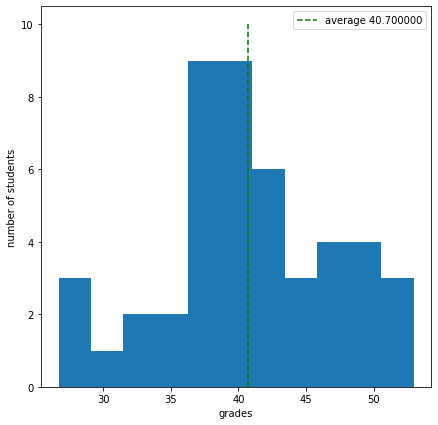

In [67]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
n,bins,patches=ax.hist(averages, bins=11)
plt.xlabel('grades')
plt.ylabel('number of students')
plt.vlines(k,0,max(n)+1,linestyle = 'dashed',color = 'g', label = 'average %2f'%k)
#plt.xticks(np.arange(len(n)), bins,rotation='vertical')
plt.legend()

In [64]:
len(n)

11

In [36]:
ranked_names=[]
for i in sorted(av, key=av.get):
    ranked_names.append(names[int(i)])

In [49]:
ranks=[[] for i in range(len(n))]
w = 0
for i,m in enumerate(n):
    for j in range(int(m)):
        ranks[i].append(ranked_names[w+j])
    w=w+int(m)

In [50]:
ranks

[['Krystin M Wasser', 'Charles T Fischer Iv', 'Nathan Cooperdock'],
 ['Logan Sperano'],
 ['Kelley E Morgan', 'Brian J Davis'],
 ['Brianna Haase', 'Xiao Ma'],
 ['Tyler J Travison',
  'Andrew Lin',
  'Xianshun Jing',
  'Mohammedanas Tai',
  'Thomas Leatherborrow',
  'Shang Wei',
  'Patrick James Meehan',
  'Brianna M Williams',
  'Ryan J Kim'],
 ['Gabriel Z Krantz',
  'Diego Alejandro Gutierrez',
  'Joseph A Gambino Iii',
  'Connor John Ricciardi',
  'Yahya Ibrahima Ndiaye',
  'Leah Kathryn Taylor',
  'Erin A Lum',
  'Sameer M Nuri',
  'Elizabeth Page Maczynski'],
 ['Dylan A Blanchard',
  'Alexander J Chmielewski',
  'Manvir Singh',
  'Gracie V Przewozny',
  'Liam P Frutchey',
  'Iffat A Chowdhury'],
 ['Zewei Liu', 'Connor Robert Irwin', 'Baisheng Zeng'],
 ['Abdulla Mohamed Naser Mubarak Badhafari',
  'Mariama Sillah',
  'Sizhen Liu',
  'James Joseph Fattorusso Jr'],
 ['Sara Schwartz', 'Rahul Ribeiro', 'Evan James Ziegelhofer', 'Eric Zhao'],
 ['Peiran Wang', 'Matthew James Pitiss', 'Nich